In [1]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [1]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import pandas as pd
df_raw = pd.read_csv("forestfires.csv")
df_raw

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [2]:
df_raw.shape

(517, 31)

In [3]:
df_raw.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [4]:
df_raw.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df_raw.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Length: 517, dtype: bool

In [6]:
df_raw.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [7]:
df_raw.isna()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
513,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
514,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
515,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df_raw.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [9]:
import matplotlib.pyplot as plt

def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

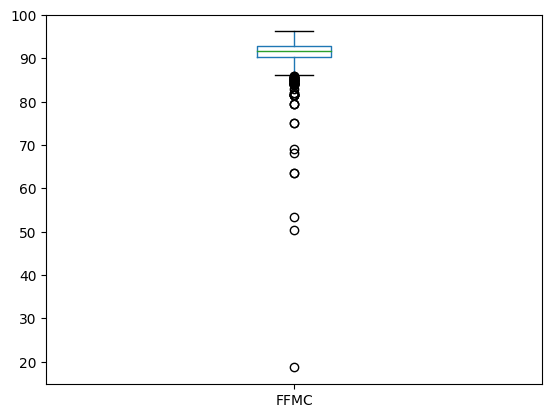

In [10]:
plot_boxplot(df_raw, "FFMC")

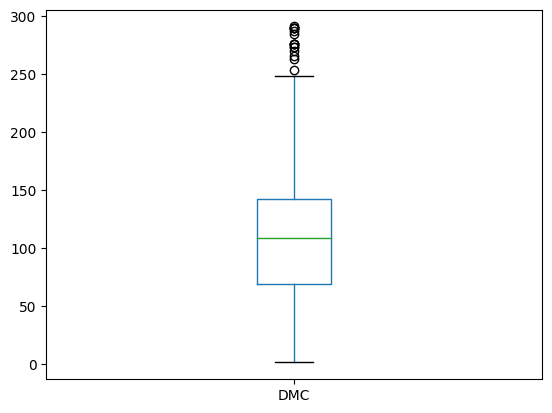

In [11]:
plot_boxplot(df_raw, "DMC")

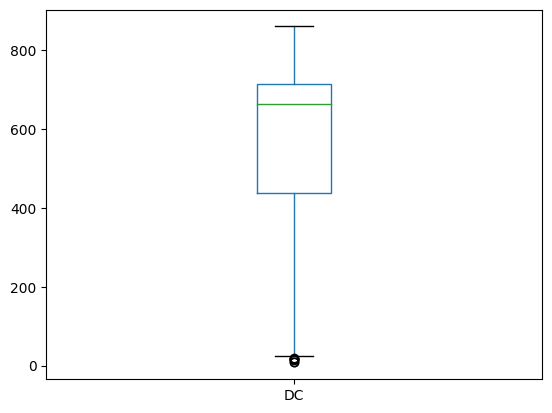

In [12]:
plot_boxplot(df_raw, "DC")

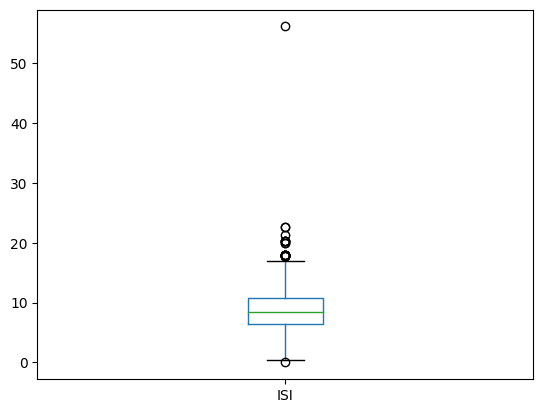

In [13]:
plot_boxplot(df_raw, "ISI")

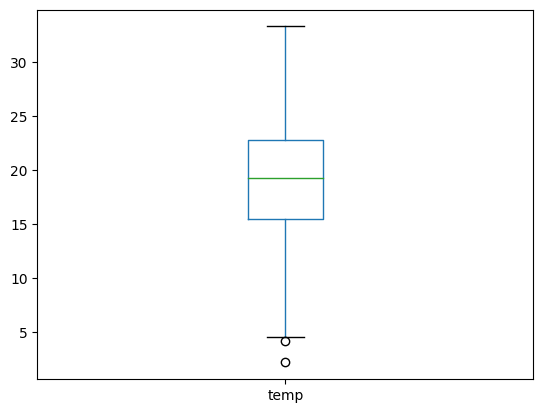

In [14]:
plot_boxplot(df_raw, "temp")

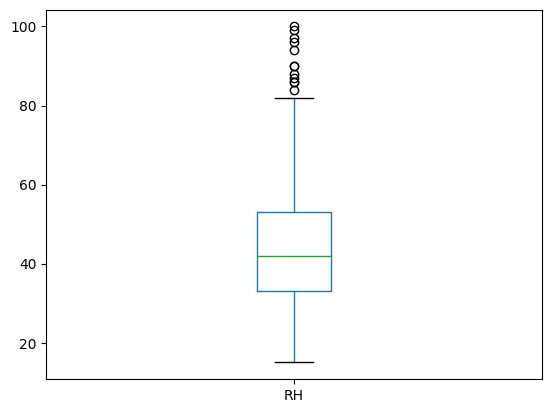

In [15]:
plot_boxplot(df_raw, "RH")

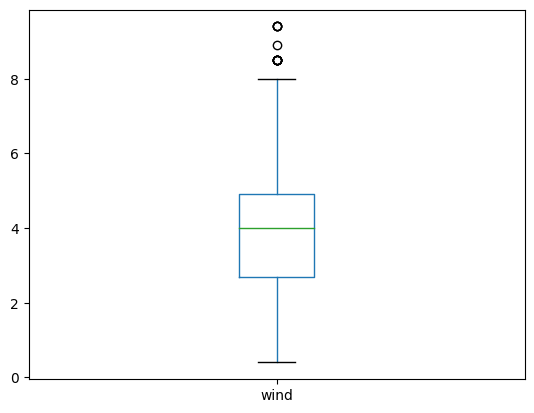

In [16]:
plot_boxplot(df_raw, "wind")

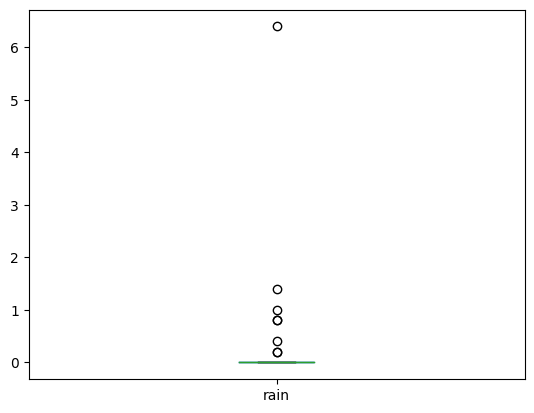

In [17]:
plot_boxplot(df_raw, "rain")

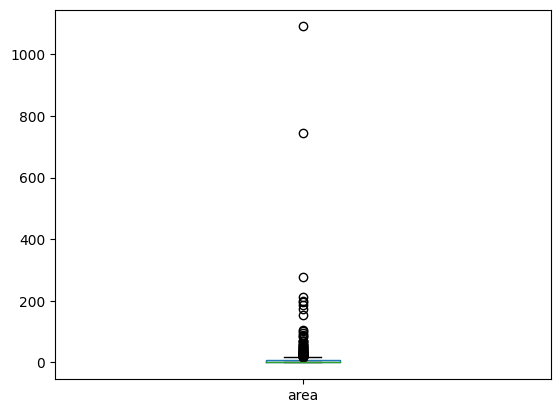

In [18]:
plot_boxplot(df_raw, "area")

In [19]:
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3-Q1
    
    lower_bound = Q1-3.5* IQR
    upper_bound = Q3 + 3.5 * IQR
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

In [20]:
index_list = []
for feature in ["FFMC","DMC","DC","ISI","temp","RH","wind","rain","area"]:
    index_list.extend(outliers(df_raw,feature))

In [21]:
index_list

[12,
 40,
 97,
 130,
 199,
 299,
 312,
 379,
 463,
 464,
 465,
 516,
 22,
 3,
 243,
 286,
 499,
 500,
 501,
 502,
 509,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 293,
 320,
 337,
 375,
 377,
 383,
 391,
 392,
 395,
 415,
 420,
 457,
 469,
 471,
 473,
 479,
 488,
 493,
 498,
 504,
 513]

In [22]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [23]:
df_cleaned = remove(df_raw,index_list)
df_cleaned.shape

(453, 31)

In [24]:
df_cleaned.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

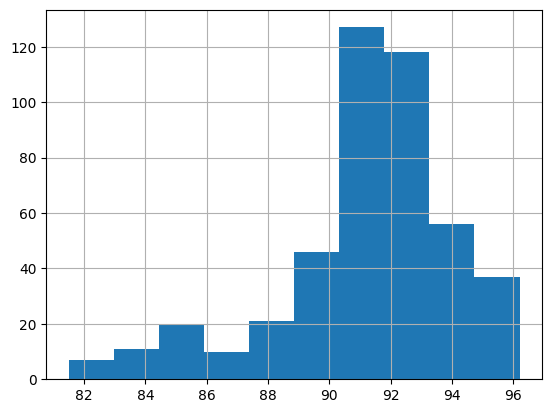

In [36]:
df_cleaned["FFMC"].hist()
plt.show()

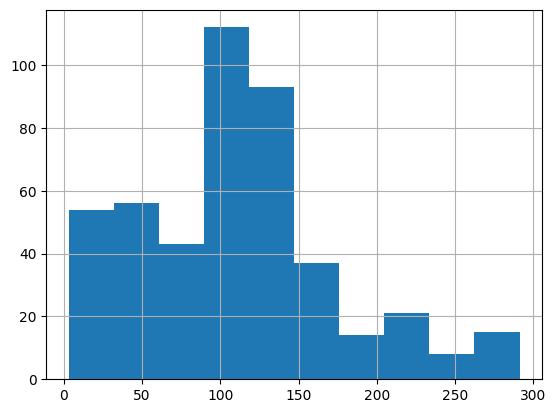

In [34]:
df_cleaned["DMC"].hist()
plt.show()

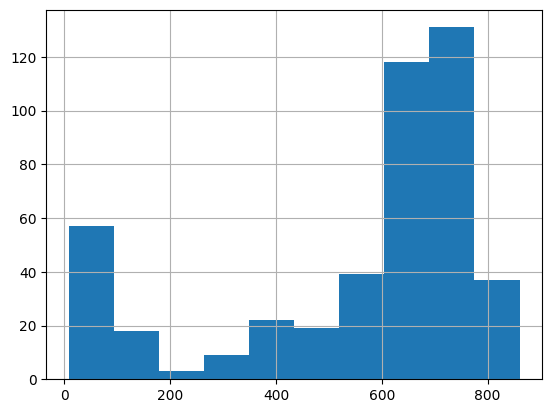

In [35]:
df_cleaned["DC"].hist()
plt.show()

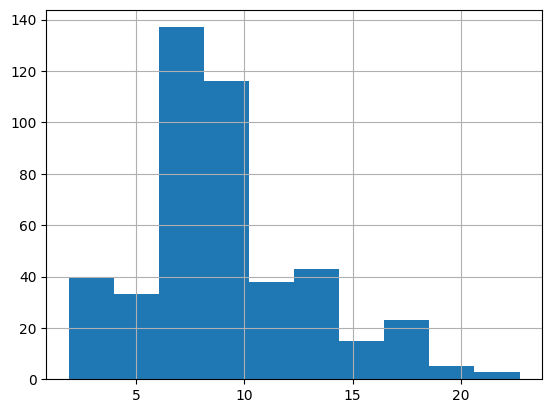

In [37]:
df_cleaned["ISI"].hist()
plt.show()

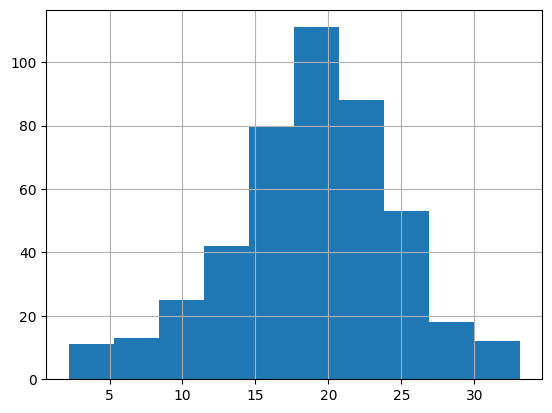

In [38]:
df_cleaned["temp"].hist()
plt.show()

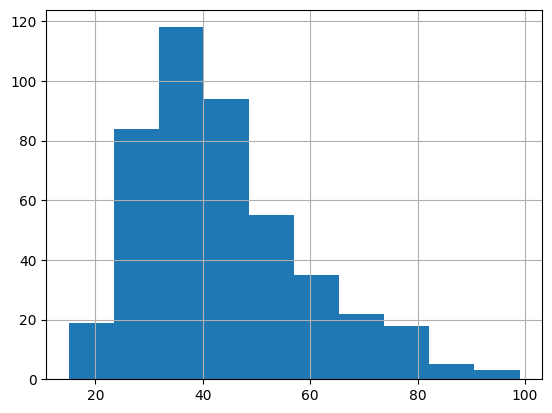

In [39]:
df_cleaned["RH"].hist()
plt.show()

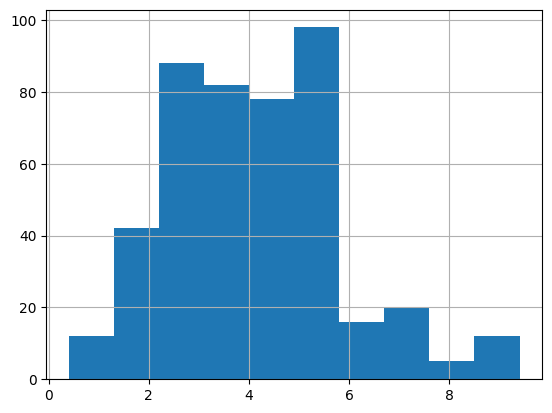

In [40]:
df_cleaned["wind"].hist()
plt.show()

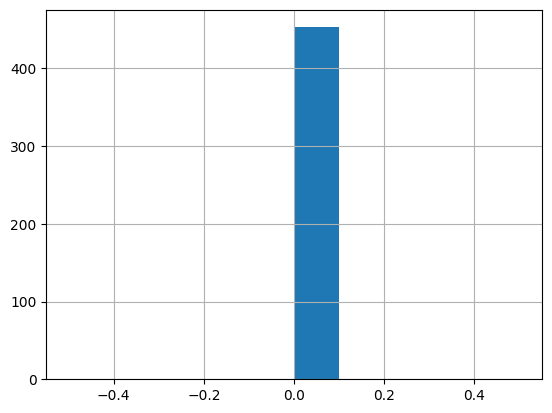

In [41]:
df_cleaned["rain"].hist()
plt.show()

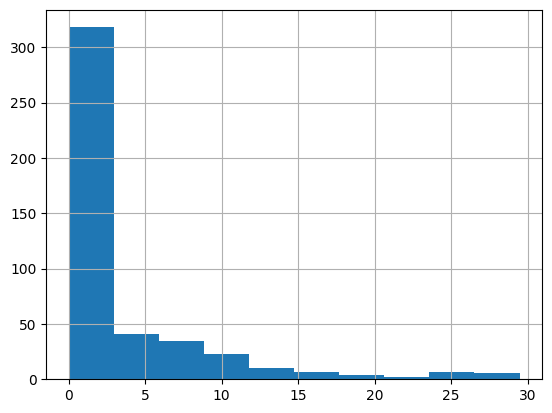

In [42]:
df_cleaned["area"].hist()
plt.show()

In [43]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_cleaned["month"] = LE.fit_transform(df_cleaned["month"])
df_cleaned["day"] = LE.fit_transform(df_cleaned["day"])
df_cleaned["size_category"] = LE.fit_transform(df_cleaned["size_category"])


In [44]:
X = df_cleaned.iloc[:,0:30]

Y = df_cleaned["size_category"]

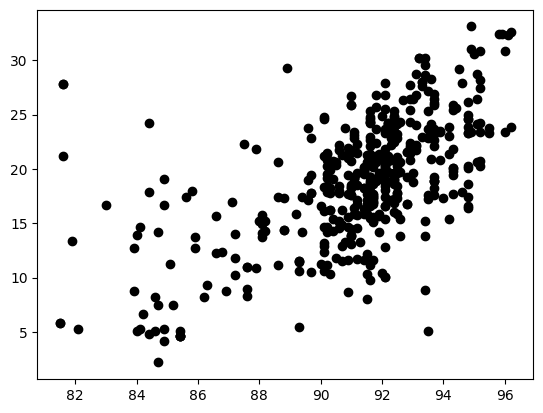

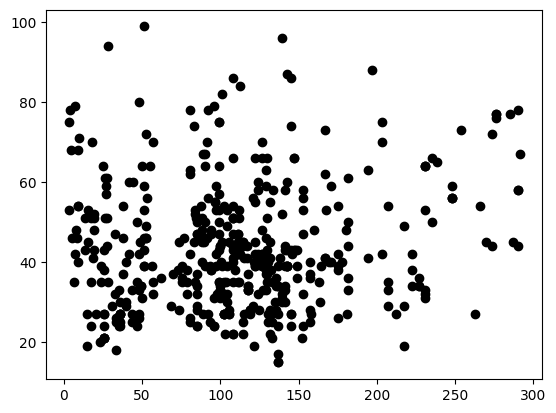

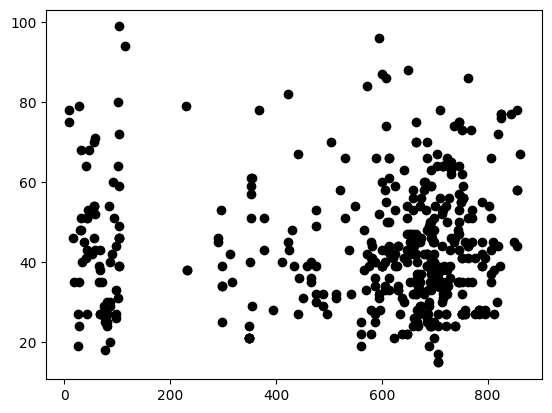

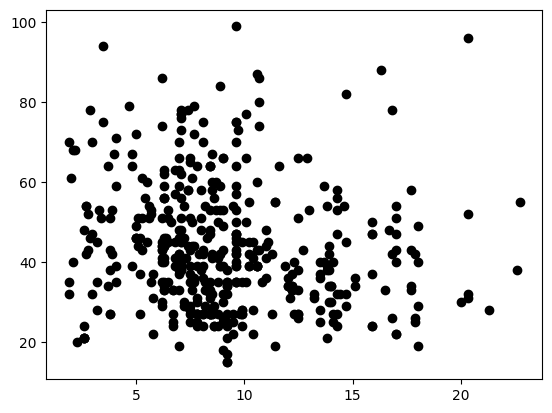

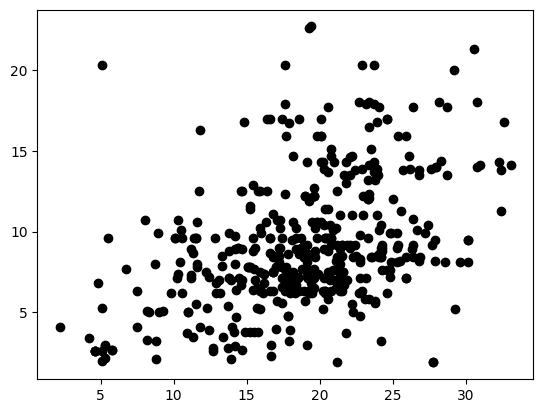

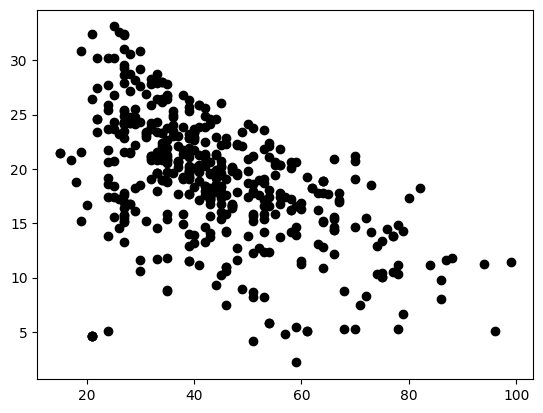

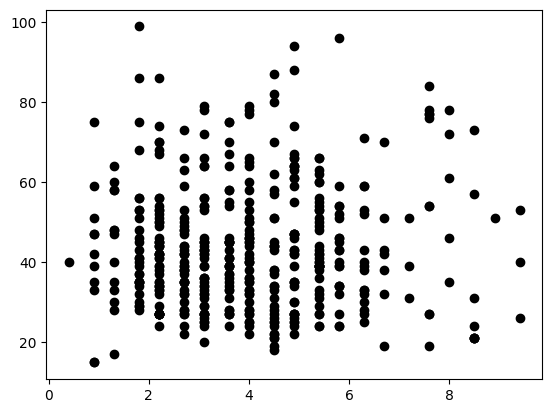

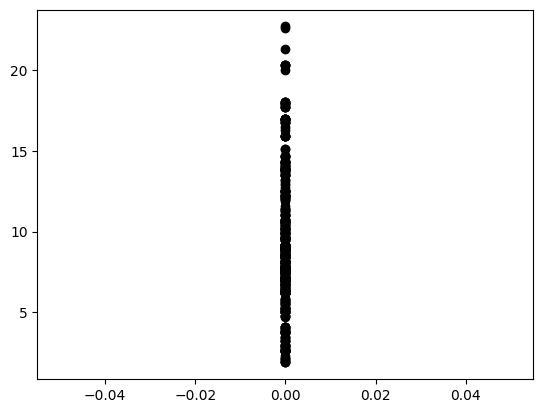

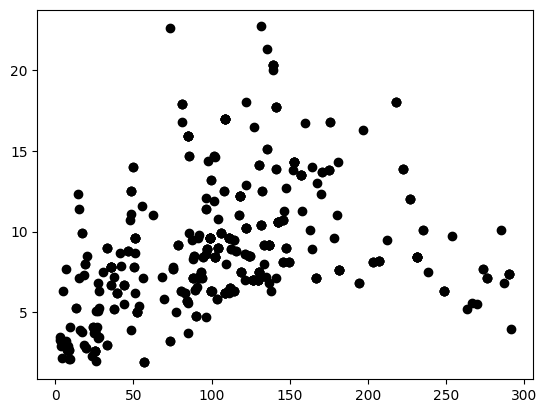

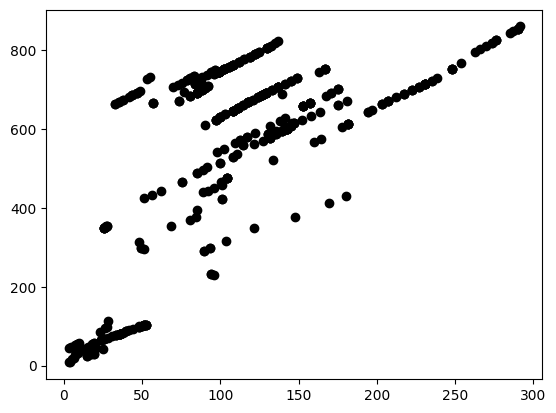

In [45]:
import matplotlib.pyplot as plt

plt.scatter(x = X["FFMC"],y = X["temp"] ,color = "black")
plt.show()
plt.scatter(x = X["DMC"],y = X["RH"] ,color = "black")
plt.show()
plt.scatter(x = X["DC"],y = X["RH"] ,color = "black")
plt.show()
plt.scatter(x = X["ISI"],y = X["RH"] ,color = "black")
plt.show()
plt.scatter(x = X["temp"],y = X["ISI"] ,color = "black")
plt.show()
plt.scatter(x = X["RH"],y = X["temp"] ,color = "black")
plt.show()
plt.scatter(x = X["wind"],y = X["RH"] ,color = "black")
plt.show()
plt.scatter(x = X["rain"],y = X["ISI"] ,color = "black")
plt.show()
plt.scatter(x = X["DMC"],y = X["ISI"] ,color = "black")
plt.show()
plt.scatter(x = X["DMC"],y = X["DC"] ,color = "black")
plt.show()

In [46]:
df_cleaned.shape

(453, 31)

In [47]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(45, input_dim=30, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

model.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])

history = model.fit(X,Y,validation_split = 0.33,epochs = 200,batch_size =3 )

scores = model.evaluate(X,Y)
print("%s:%2f%%"%(model.metrics_names[1],scores[1]*100))

history.history.keys()

Epoch 1/200
101/101 [==============================] - 1s 2ms/step - loss: 0.5157 - accuracy: 0.8086 - val_loss: 0.5364 - val_accuracy: 0.7600
Epoch 2/200
101/101 [==============================] - 0s 904us/step - loss: 0.4263 - accuracy: 0.8317 - val_loss: 0.4466 - val_accuracy: 0.7933
Epoch 3/200
101/101 [==============================] - 0s 901us/step - loss: 0.3410 - accuracy: 0.8680 - val_loss: 0.3725 - val_accuracy: 0.8733
Epoch 4/200
101/101 [==============================] - 0s 911us/step - loss: 0.2774 - accuracy: 0.9076 - val_loss: 0.3050 - val_accuracy: 0.8467
Epoch 5/200
101/101 [==============================] - 0s 903us/step - loss: 0.2212 - accuracy: 0.9208 - val_loss: 0.2225 - val_accuracy: 0.9067
Epoch 6/200
101/101 [==============================] - 0s 900us/step - loss: 0.1629 - accuracy: 0.9472 - val_loss: 0.1949 - val_accuracy: 0.9133
Epoch 7/200
101/101 [==============================] - 0s 889us/step - loss: 0.1434 - accuracy: 0.9373 - val_loss: 0.2721 - val_accu

101/101 [==============================] - 0s 898us/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0995 - val_accuracy: 0.9533
Epoch 58/200
101/101 [==============================] - 0s 884us/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.1038 - val_accuracy: 0.9533
Epoch 59/200
101/101 [==============================] - 0s 875us/step - loss: 0.0128 - accuracy: 0.9967 - val_loss: 0.0976 - val_accuracy: 0.9467
Epoch 60/200
101/101 [==============================] - 0s 882us/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.1255 - val_accuracy: 0.9400
Epoch 61/200
101/101 [==============================] - 0s 876us/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.1032 - val_accuracy: 0.9533
Epoch 62/200
101/101 [==============================] - 0s 901us/step - loss: 0.0829 - accuracy: 0.9703 - val_loss: 0.4660 - val_accuracy: 0.8933
Epoch 63/200
101/101 [==============================] - 0s 891us/step - loss: 0.0730 - accuracy: 0.9901 - val_loss: 0.1246 - val_accuracy

101/101 [==============================] - 0s 925us/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.1124 - val_accuracy: 0.9400
Epoch 114/200
101/101 [==============================] - 0s 897us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.1119 - val_accuracy: 0.9600
Epoch 115/200
101/101 [==============================] - 0s 892us/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.1146 - val_accuracy: 0.9533
Epoch 116/200
101/101 [==============================] - 0s 906us/step - loss: 0.0078 - accuracy: 0.9967 - val_loss: 0.1160 - val_accuracy: 0.9600
Epoch 117/200
101/101 [==============================] - 0s 899us/step - loss: 0.0568 - accuracy: 0.9868 - val_loss: 0.1310 - val_accuracy: 0.9467
Epoch 118/200
101/101 [==============================] - 0s 893us/step - loss: 0.0160 - accuracy: 0.9934 - val_loss: 0.1140 - val_accuracy: 0.9667
Epoch 119/200
101/101 [==============================] - 0s 881us/step - loss: 0.0079 - accuracy: 0.9967 - val_loss: 0.1406 - val_ac

Epoch 169/200
101/101 [==============================] - 0s 878us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1768 - val_accuracy: 0.9400
Epoch 170/200
101/101 [==============================] - 0s 891us/step - loss: 0.0861 - accuracy: 0.9835 - val_loss: 0.2099 - val_accuracy: 0.9333
Epoch 171/200
101/101 [==============================] - 0s 882us/step - loss: 0.0521 - accuracy: 0.9736 - val_loss: 0.1700 - val_accuracy: 0.9333
Epoch 172/200
101/101 [==============================] - 0s 894us/step - loss: 0.0460 - accuracy: 0.9802 - val_loss: 0.2352 - val_accuracy: 0.9267
Epoch 173/200
101/101 [==============================] - 0s 889us/step - loss: 0.0129 - accuracy: 0.9967 - val_loss: 0.1221 - val_accuracy: 0.9533
Epoch 174/200
101/101 [==============================] - 0s 893us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.1344 - val_accuracy: 0.9533
Epoch 175/200
101/101 [==============================] - 0s 896us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

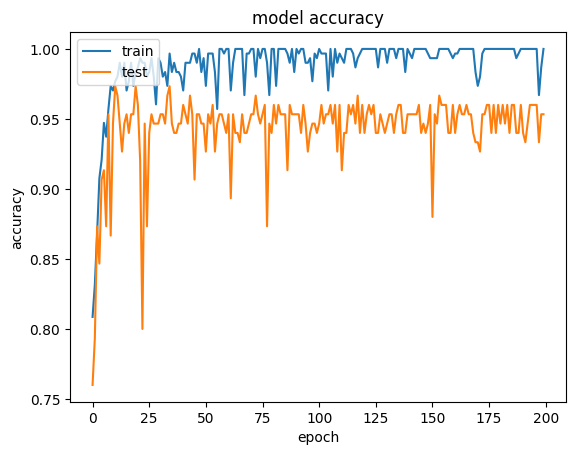

In [48]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc = "upper left")
plt.show()